analysis borrowed from lifelines documentation https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html

Piecewise exponential analysis borrowed from here https://github.com/CamDavidsonPilon/lifelines/blob/master/examples/SaaS%20churn%20and%20piecewise%20regression%20models.ipynb

In [1]:
from lifelines import LogLogisticAFTFitter, WeibullAFTFitter, LogNormalAFTFitter
from lifelines.datasets import load_rossi

In [2]:
rossi = load_rossi()

In [3]:
llf = LogLogisticAFTFitter().fit(rossi, 'week', 'arrest')
lnf = LogNormalAFTFitter().fit(rossi, 'week', 'arrest')
wf = WeibullAFTFitter().fit(rossi, 'week', 'arrest')

In [4]:
print(llf.AIC_)  # 1377.877
print(lnf.AIC_)  # 1384.469
print(wf.AIC_)   # 1377.833, slightly the best model.

1377.877012356247
1384.4692508817013
1377.8331278951669


In [5]:
# with some heterogeneity in the ancillary parameters
ancillary = rossi[['prio']]
llf = LogLogisticAFTFitter().fit(rossi, 'week', 'arrest', ancillary=ancillary)
lnf = LogNormalAFTFitter().fit(rossi, 'week', 'arrest', ancillary=ancillary)
wf = WeibullAFTFitter().fit(rossi, 'week', 'arrest', ancillary=ancillary)

In [6]:
print(llf.AIC_) # 1377.89, the best model here, but not the overall best.
print(lnf.AIC_) # 1380.79
print(wf.AIC_)  # 1379.21

1377.8977823020325
1380.7974417743326
1379.2121834700297


In [8]:
from lifelines.fitters.piecewise_exponential_regression_fitter import PiecewiseExponentialRegressionFitter
from lifelines import KaplanMeierFitter

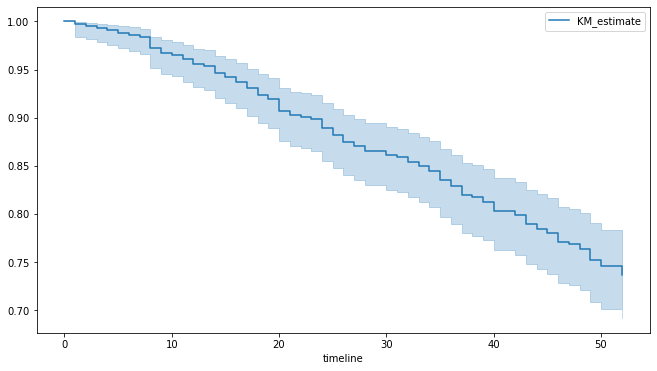

In [11]:
kmf = KaplanMeierFitter().fit(rossi['week'], rossi['arrest'])
kmf.plot(figsize=(11,6));

In [13]:
pew = PiecewiseExponentialRegressionFitter(breakpoints=(8, 20)).fit(rossi, 'week', 'arrest')

/Users/arjunchandrasekhar/opt/anaconda3/envs/cmpinf2120/lib/python3.9/site-packages/lifelines/fitters/__init__.py:2317: ApproximationWarning: Approximating using `predict_survival_function`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  warnings.warn(


In [14]:
print(pew.AIC_)

1388.9934914867804
